# Spatial Filtering

<function matplotlib.pyplot.show(close=None, block=None)>

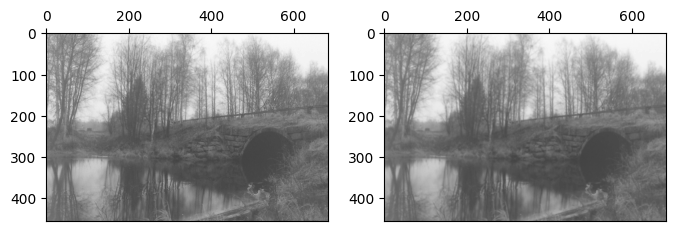

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('equlhist.png', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert im is not None

kernel = np.ones((3,3), np.float32)/9.
result = cv.filter2D(im,-1,kernel)

fig,ax = plt.subplots(1,2, figsize=(8,16))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[0].xaxis.tick_top()
ax[1].imshow(result, cmap='gray', vmin=0, vmax=255)
ax[1].xaxis.tick_top()
plt.show

# Sobel opeator

<function matplotlib.pyplot.show(close=None, block=None)>

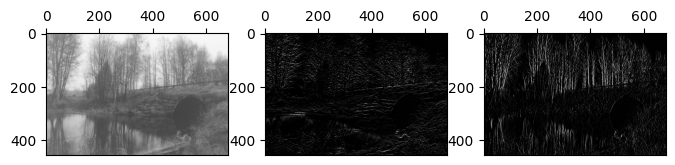

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('equlhist.png', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert im is not None

sobel_h = np.array([[-1, -2, -1], [0, 0, 0], [1,2,1]])
result_h = cv.filter2D(im,-1,sobel_h)
result_h = cv.normalize(result_h, None, 0 , 255, cv.NORM_MINMAX, dtype=cv.CV_32F)

sobel_v = np.array([[-1, 0, 1], [-2, 0, 2], [-1,0,1]])
result_v = cv.filter2D(im,-1,sobel_v)
result_v = cv.normalize(result_v, None, 0 , 255, cv.NORM_MINMAX, dtype=cv.CV_32F)


fig,ax = plt.subplots(1,3, figsize=(8,16))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[0].xaxis.tick_top()
ax[1].imshow(result_h, cmap='gray', vmin=0, vmax=255)
ax[1].xaxis.tick_top()
ax[2].imshow(result_v, cmap='gray', vmin=0, vmax=255)
ax[2].xaxis.tick_top()
plt.show

# Question 6

(a)

<function matplotlib.pyplot.show(close=None, block=None)>

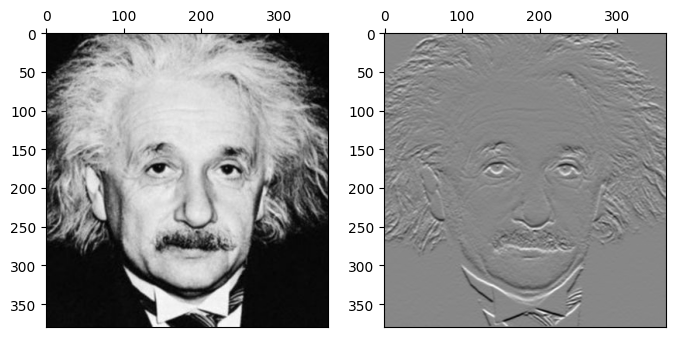

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
assert im is not None

gradx = cv.normalize(im.astype('float'), None, 0.0 , 1.0, cv.NORM_MINMAX)


gradxx = cv.Sobel(gradx, -1,0,1, ksize=3)
grad_x = cv.normalize(gradxx.astype('float'), None, 0 , 1.0, cv.NORM_MINMAX)

fig,ax = plt.subplots(1,2, figsize=(8,16))
ax[0].imshow(im, cmap='gray')
ax[0].xaxis.tick_top()
ax[1].imshow(grad_x, cmap='gray')
ax[1].xaxis.tick_top()

plt.show



(b)

<function matplotlib.pyplot.show(close=None, block=None)>

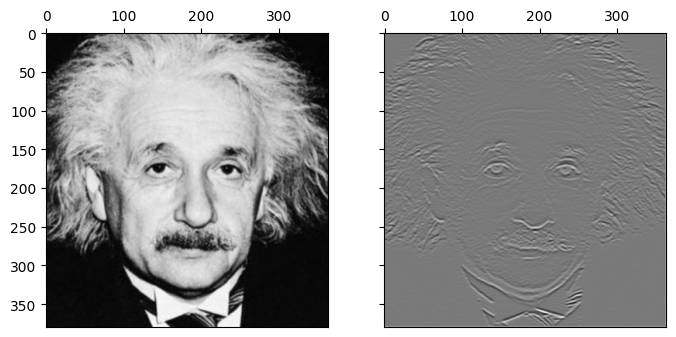

In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
assert im is not None

gradx = cv.normalize(im.astype('float'), None, 0.0 , 1.0, cv.NORM_MINMAX)

sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1,2,1]])
h,w = im.shape

k_hh,k_hw = sobel_v.shape[0]//2, sobel_h.shape[1]//2
grad_x_a = np.ones(im.shape, np.float32)
for m in range(k_hh , h -k_hh):
    for n in range(k_hw , w - k_hw):
        grad_x_a[m,n] = np.dot(grad_x[m-k_hh : m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), sobel_v.flatten())
fig,ax = plt.subplots(1,2, sharex = 'all', sharey = 'all', figsize=(8,16))
ax[0].imshow(im, cmap='gray')
ax[0].xaxis.tick_top()
ax[1].imshow(grad_x_a, cmap='gray')
ax[1].xaxis.tick_top()

plt.show

(C)

<function matplotlib.pyplot.show(close=None, block=None)>

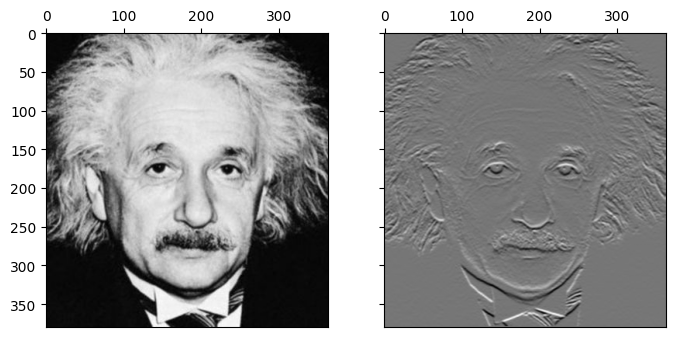

In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
assert im is not None

gradx = cv.normalize(im.astype('float'), None, 0.0 , 1.0, cv.NORM_MINMAX)

k1 = np.array([[1],[2],[3]], np.float32)
k2 = np.array([1 , 0, -1], np.float32)

filtered_seperably = cv.sepFilter2D(gradx, -1, k1, k2)


fig,ax = plt.subplots(1,2, sharex = 'all', sharey = 'all', figsize=(8,16))
ax[0].imshow(im, cmap='gray')
ax[0].xaxis.tick_top()

ax[1].imshow(filtered_seperably, cmap='gray')
ax[1].xaxis.tick_top()

plt.show